In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("D:\\dsml\\ML\\final as\\CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
x=df.drop(columns=['price','car_ID','CarName'])
y=df['price']

In [9]:
x=pd.get_dummies(x,drop_first=True)

In [10]:
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,False,False,False,False,False,False,False,True,False,False
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,False,False,False,False,False,False,False,True,False,False
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,False,False,False,False,False,False,False,True,False,False
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,False,False,False,False,False,True,False,False,False,False


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

In [13]:
result={}
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    result[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred)
    }

In [14]:
result_df=pd.DataFrame(result).T

In [15]:
result_df

,MAE,MSE,r2
Linear Regression,2089.382729,8.482008e+06,0.892557
Decision Tree,1886.321146,8.300272e+06,0.894859
Random Forest,1259.757695,3.313970e+06,0.958021
Gradient Boosting,1676.027625,5.900139e+06,0.925262
Support Vector Regressor,5697.657697,8.682982e+07,-0.099891


In [16]:
best_model = result_df['r2'].idxmax()
best_model

'Random Forest'

In [17]:
rand=RandomForestRegressor()
rand.fit(x_train,y_train)
importan_features=rand.feature_importances_ 

In [18]:
importan_features

array([1.20570227e-03, 9.71890761e-03, 1.41867557e-02, 1.09783941e-02,
       4.32875825e-03, 2.24539023e-01, 5.97072728e-01, 4.25654568e-03,
       3.74976178e-03, 3.44372031e-03, 2.19554958e-02, 6.48832443e-03,
       9.73451010e-03, 7.49460717e-02, 9.96020188e-05, 9.41040357e-04,
       3.09014514e-04, 6.87311531e-04, 1.02804630e-03, 1.02839795e-03,
       3.41380367e-04, 6.93056545e-04, 1.23605723e-03, 2.22564031e-05,
       3.71492480e-05, 1.50979578e-04, 1.52219800e-03, 1.20949742e-04,
       1.01733431e-04, 3.80692825e-05, 1.05831919e-04, 1.50306821e-03,
       6.50709760e-04, 0.00000000e+00, 2.73162159e-05, 3.04215218e-06,
       2.43281346e-04, 3.13085240e-05, 9.62287972e-05, 7.97419299e-06,
       2.17120843e-03, 8.72645664e-05, 1.10824792e-04])

In [19]:
e = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importan_features
})

In [20]:
e = e.sort_values(by='Importance', ascending=False)

In [21]:
e.head()

,Feature,Importance
6,enginesize,0.597073
5,curbweight,0.224539
13,highwaympg,0.074946
10,horsepower,0.021955
2,carlength,0.014187


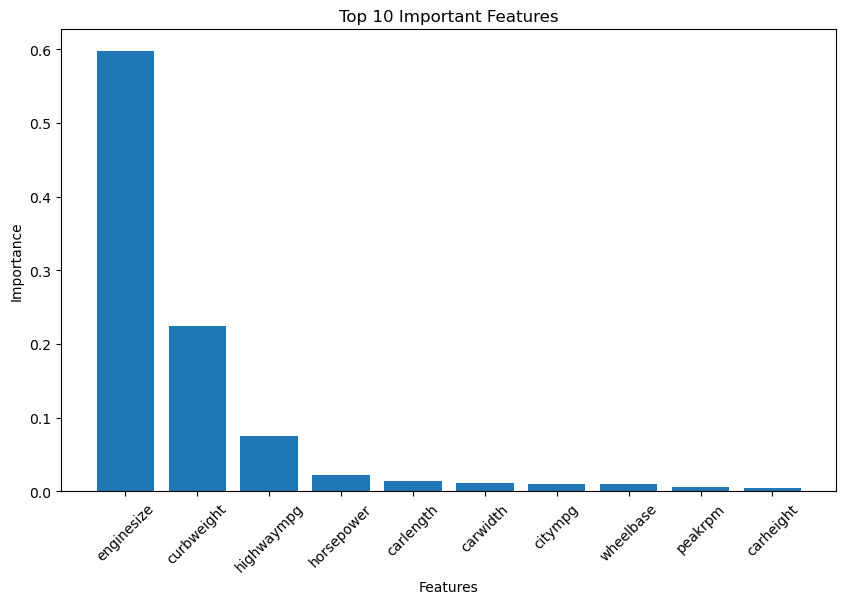

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(e['Feature'][:10], e['Importance'][:10])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Top 10 Important Features")
plt.xticks(rotation=45) 
plt.show()

In [23]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5]
}


In [24]:
rf=GridSearchCV(RandomForestRegressor(random_state=42),param_grid,cv=5)
rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 15, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [25]:
g=rf.best_estimator_

In [26]:
yp=g.predict(x_test_scaled)

NameError: name 'x_test_scaled' is not defined

In [ ]:
r2_score(y_test,yp)

In [ ]:
rf.best_params_